In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import urllib.request, json 

# Response and effect time line

In [15]:
def linear_fit(x, a, b):
    return  a*x+b

def country_dynamics(category, country, cut, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
    ax.set_yscale('log')
    cum = data[category].copy().T[[country]]
    focus = (cum - cum.shift(1)).iloc[cut:,:]
    
    ax.plot(cum.iloc[cut:,:], alpha=0.8, lw=2, label=category + ' cases in ' + country )
    ax.scatter(focus.index, focus[country], c='gray', s=5)
    
    for i,(a,b) in enumerate(days):
        slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
        ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
        ax.annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=20, c=('C'+str(i+1)))                    
            
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    plt.tight_layout()
    return fig, ax

def country_dynamics_all(country, cut, days):
    fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,12))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i,category in enumerate(data.keys()):
        ax[i].set_yscale('log')
        cum = data[category].copy().T[[country]]
        focus = (cum - cum.shift(1)).iloc[cut:,:]

        ax[i].plot(cum.iloc[cut:,:], alpha=0.5, lw=2, label=category + ' cases in ' + country )
        ax[i].scatter(focus.index, focus[country], c='gray', s=5)

        for j,(a,b) in enumerate(days[i]):
            slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
            ax[i].plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(j+1)))
            ax[i].annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=14, c=('C'+str(j+1)))  

        ax[i].legend(prop={'size': 12})
        ax[i].tick_params(labelrotation=90, labelsize=14)
        # ax.xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.tight_layout()
        
def country_dynamics_all_in_one(country, cut, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,10))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i,category in enumerate(data.keys()):
        ax.set_yscale('log')
        focus = (cum - cum.shift(1)).iloc[cut:,:]

#         ax.plot(cum.iloc[cut:,:], alpha=0.5, lw=2, label=category + ' cases in ' + country )
        ax.scatter(focus.index, focus[country], c='gray', s=5)

        for j,(a,b) in enumerate(days[i]):
            slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
            ax[i].plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(j+1)))
            ax[i].annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=14, c=('C'+str(j+1)))  

        ax[i].legend(prop={'size': 12})
        ax[i].tick_params(labelrotation=90, labelsize=14)
        # ax.xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.tight_layout()

        
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region')
death = pd.read_csv('data/JH/death_agg.csv').set_index('Country/Region')
recover = pd.read_csv('data/JH/recover_agg.csv').set_index('Country/Region')
data = {'Confirmed':confirm, 'Death':death, 'Recovered':recover}

Text(18, 12, 'All Wuhan apartment\ncomplex "close\nmanagement"')

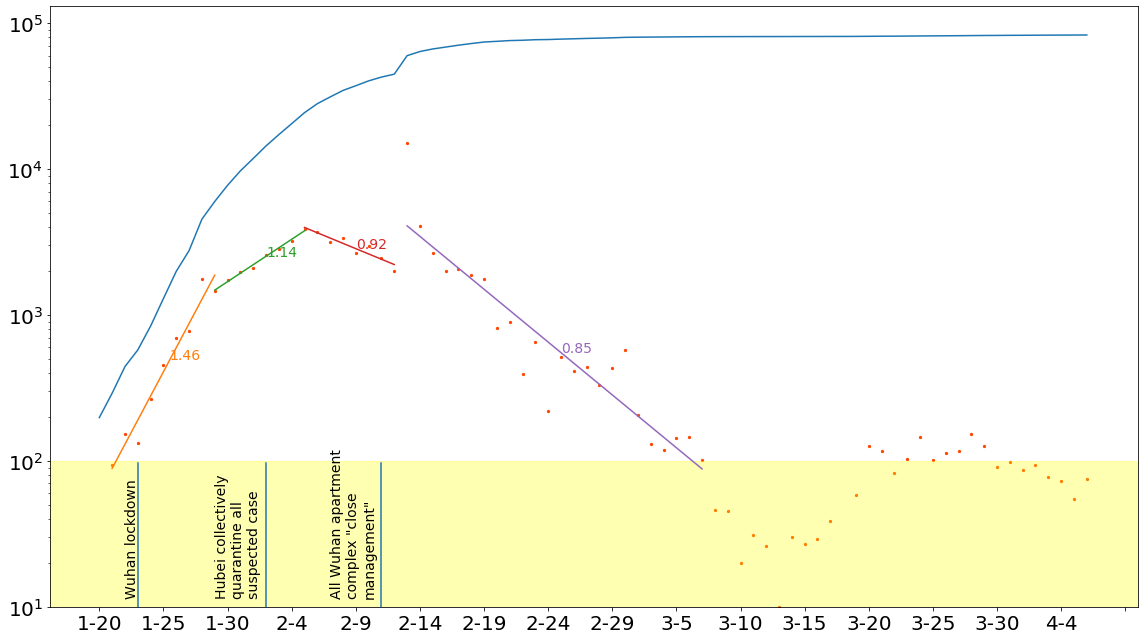

In [107]:
df = pd.read_csv('data/2019-nCov stats - International.csv', ).set_index('time')\
    .drop(['Hongkong','Macao','Taiwan','Diamond Princess'])\
    .T.dropna(how='all')\
    .drop('Alert Level')

def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for i,(a,b) in enumerate(days):
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y, c=('C'+str(i+1)))
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14, c=('C'+str(i+1)))

    ax.tick_params(labelsize=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(17))
#     ax.set_xlim(left=25)
    plt.tight_layout()
    return fig, ax
    
fig, ax = country_dynamic('China', [(1,10),(9,17),(16,24),(24,48)])
plt.axhspan(ymin=10, ymax=100, color='yellow', alpha=0.3)
ax.set_ylim(bottom=10)

ax.axvline(x=3, ymin=0, ymax=0.24)
ax.annotate('Wuhan lockdown',xy=(2,12), rotation=90, size=14)

ax.axvline(x=13, ymin=0, ymax=0.24)
ax.annotate('Hubei collectively \nquarantine all\nsuspected case',xy=(9,12), rotation=90, size=14)

ax.axvline(x=22, ymin=0, ymax=0.24)
ax.annotate('All Wuhan apartment\ncomplex "close\nmanagement"',xy=(18,12), rotation=90, size=14)


In [124]:
df = pd.read_clipboard().set_index('US')
df

,New York,New Jersey,California,Michigan,Florida,Massachusetts,Louisiana,Illinois,Washington,Pennsylvania,...,Puerto Rico,Montana,West Virginia,South Dakota,North Dakota,Alaska,Wyoming,Guam,Virgin Islands,Northern Mariana Islands
US,,,,,,,,,,,,,,,,,,,,,
2020-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-23,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24,NaN,NaN,2.0,NaN,NaN,0.0,NaN,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,15.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,1.0,NaN,NaN,0.0,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,5.0,NaN,NaN,0.0,NaN,0.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


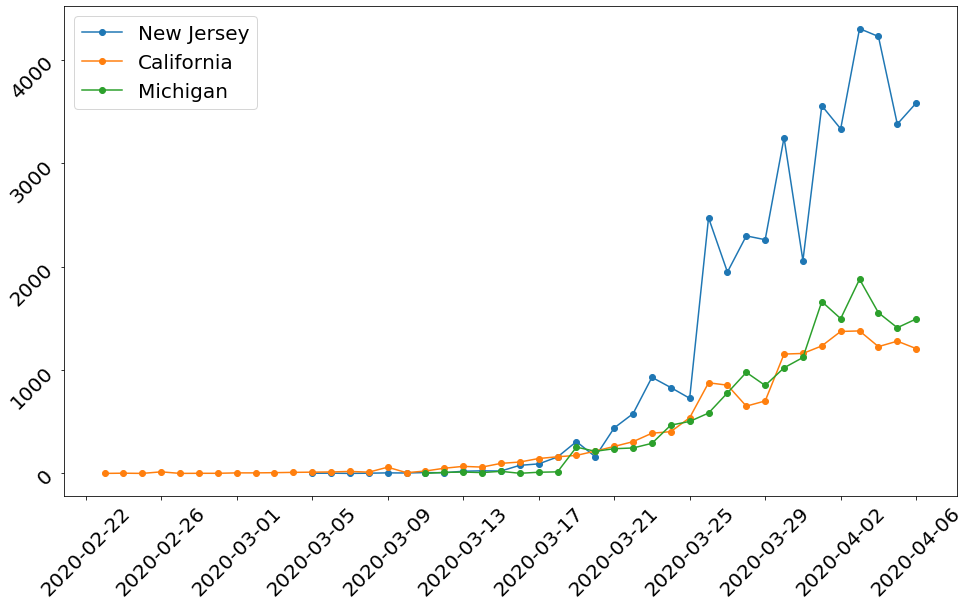

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
for i in list(df)[1:4]:
    ax.plot(df[i], 'o-', label=i)
# ax.set_yscale('log')
ax.tick_params(rotation=45, labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.legend(fontsize=20)

# https://covidcurvetracker.org/

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
focus = df.copy().drop(['Lat','Long'], axis=1).set_index(['Country/Region','Province/State'])
death = focus.groupby('Country/Region').sum()

In [36]:
china = death.T[['China']]

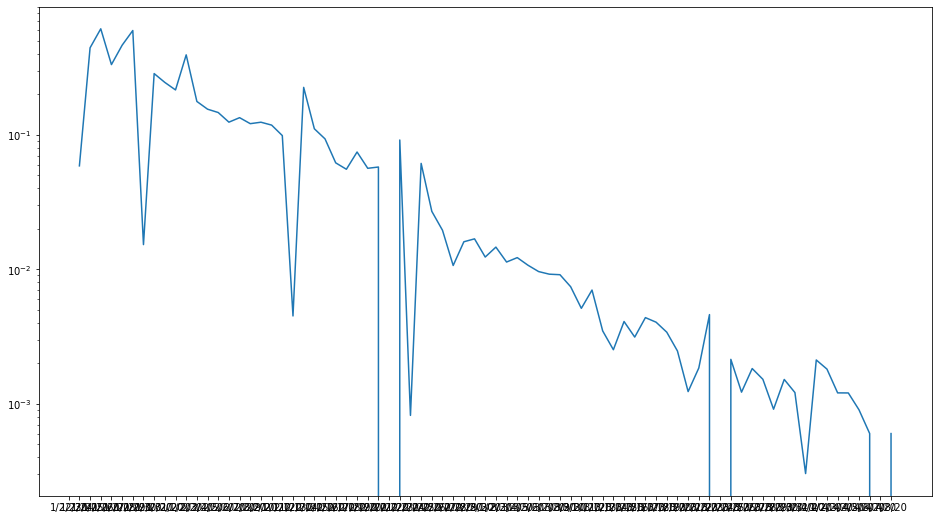

In [43]:
china['new'] = (china['China'] - china['China'].shift(1)) / china['China'].shift(1)
china

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
ax.plot(china['new'])
ax.set_yscale('log')

# Days after quatantine

In [109]:
focus = pd.read_csv('data/country detailed/2019-nCov stats - temp.csv').set_index('Unnamed: 0').fillna(0).iloc[:-1,:]
focus

,Hubei,Lombardy,California,Austria
Unnamed: 0,,,,
1-20,270,0.0,0.0,0.0
1-21,375,0.0,0.0,0.0
1-22,444,0.0,0.0,0.0
1-23,549,0.0,0.0,0.0
1-24,729,0.0,0.0,0.0
...,...,...,...,...
43927,67803,51534.0,16284.0,12297.0
43928,67803,52325.0,17540.0,12639.0
43929,67803,53414.0,19043.0,12942.0


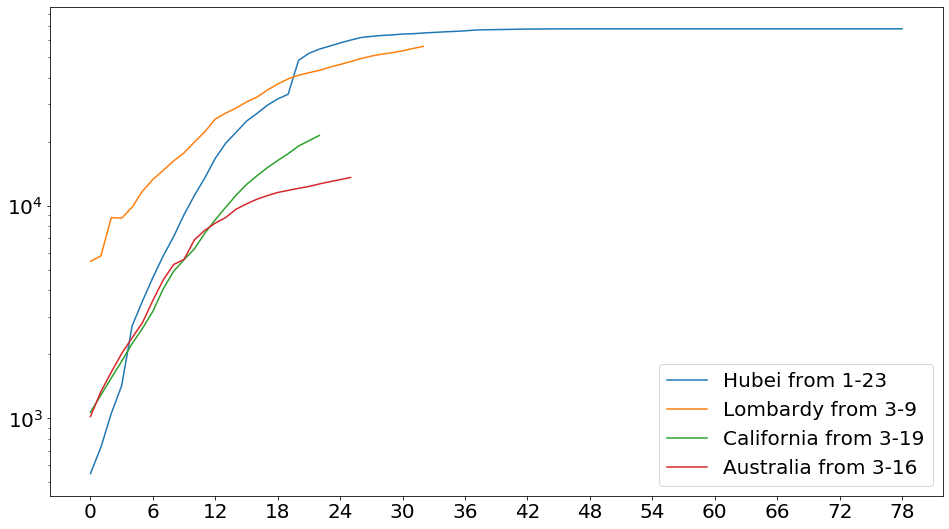

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.set_yscale('log')
ax.plot(focus.Hubei.values[3:], label='Hubei from 1-23')
ax.plot(focus.Lombardy.values[49:], label='Lombardy from 3-9')
ax.plot(focus.California.values[59:], label='California from 3-19')
ax.plot(focus.Austria.values[56:], label='Australia from 3-16')

ax.legend(fontsize=20)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))

In [110]:
window = 5
for i in list(focus):
    focus[i] = focus[i].rolling(window=window, min_periods=1).mean()
    focus[i + '_r'] = focus[i] / focus[i].shift(1) - 1

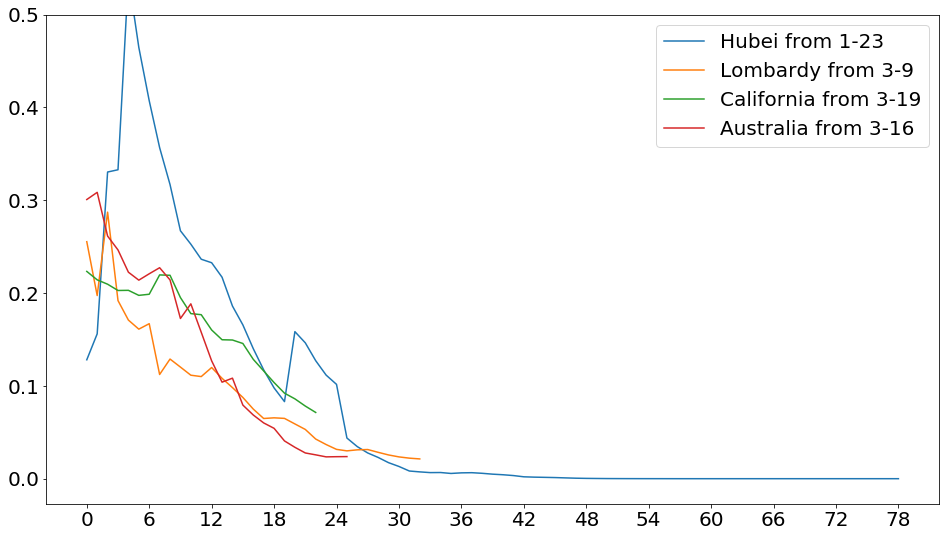

In [111]:


fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

# ax.set_yscale('log')
ax.plot(focus.Hubei_r.values[3:], label='Hubei from 1-23')
ax.plot(focus.Lombardy_r.values[49:], label='Lombardy from 3-9')
ax.plot(focus.California_r.values[59:], label='California from 3-19')
ax.plot(focus.Austria_r.values[56:], label='Australia from 3-16')

ax.set_ylim(top=0.5)
# ax.axvline(x=5)

ax.legend(fontsize=20)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))

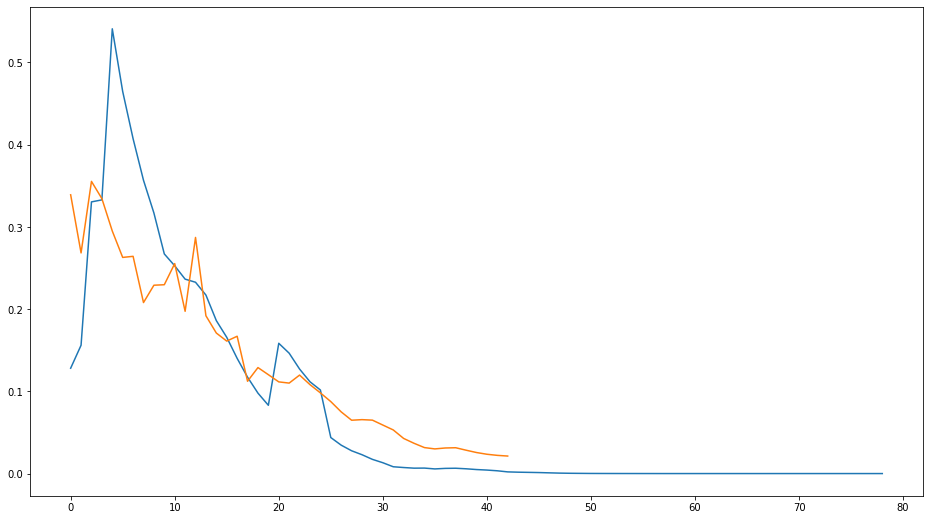

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

# ax.set_yscale('log')
ax.plot(focus.Hubei_r.values[3:], label='Hubei from 1-23')
ax.plot(focus.Lombardy_r.values[39:], label='Lombardy from 3-9')

# Regional Dynamics

In [103]:
s = '1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU'
gid = '&gid=1476893770'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1]).set_index(['Italy'])

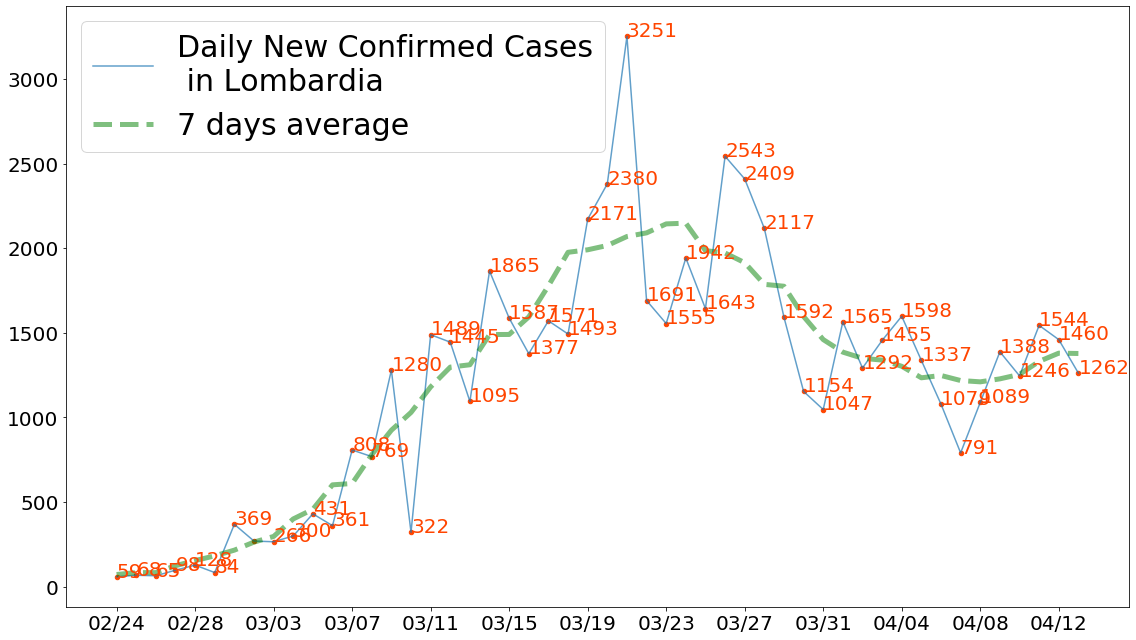

In [77]:
focus = df.iloc[:,:21].clip(lower=0)
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time',axis=1,inplace=True)

offset = 5
date = '_4_15'
country = 'Lombardia'

focus = focus[[country]][offset:]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus[country], label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
ax.scatter(focus.index, focus[country], c='orangered',s=20, label='')

# average
window = 7
focus['average'] = focus[country].rolling(window=window, min_periods=1, center=True).mean()
ax.plot(focus.index, focus.average, 'g--', lw=5, alpha=0.5, label='%d days average'%window)

for i, v in enumerate(focus[country]):
    if v > 0 and v not in [5974,4050,5210,4668,3590,6549,3836,3951,3148,19444,4056,32829,29595,5267,7967,6969,5051,
                          7846,7947,6824,4790,29861,17821,5526,432,323,1119,1175,582,270,196,163,1178,1028,1289,1617,
                          1991,2926,1192,958,591]:
        ax.text(focus.index[i], v+0.3, str(int(v)), color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.format_xdata = mdates.DateFormatter('%m-%d')

# plt.savefig(r'figures/%s.png'% (country+date), dpi=600)

Text(16.5, 300, 'Northern Italy lockdown')

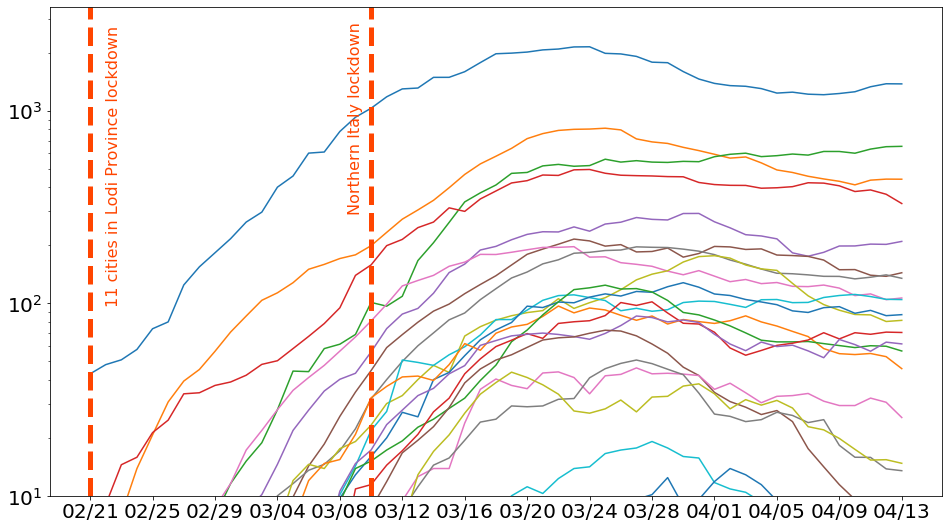

In [141]:
s = '1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU'
gid = '&gid=1476893770'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1]).set_index(['Italy'])

focus = df.iloc[2:,:21].clip(lower=0)
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time',axis=1,inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for i in list(focus):
    ax.plot(focus[i].rolling(window=window, min_periods=1, center=True).mean(), label=i)
ax.set_yscale('log')
ax.set_ylim(bottom=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# ax.legend()
ax.tick_params(labelsize=20)

ax.axvline(x=0, lw=5, ls='--', color='orangered')
ax.axvline(x=18, lw=5, ls='--', color='orangered')

ax.annotate('11 cities in Lodi Province lockdown', xy=(1,100), color='orangered', rotation=90, fontsize=16)
ax.annotate('Northern Italy lockdown', xy=(16.5,300), color='orangered', rotation=90, fontsize=16)

Text(0.2, 700, 'Wuhan lockdown')

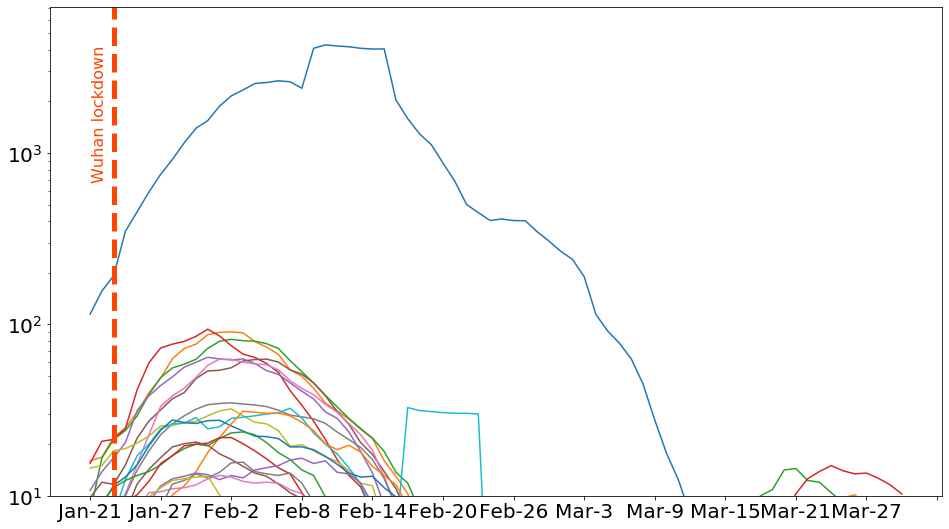

In [150]:
s = '1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU'
gid = '&gid=48820'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[0]).set_index('Unnamed: 0').iloc[:,35:66].dropna(how='all')

focus = df.copy()
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for i in list(focus):
    ax.plot(focus[i].rolling(window=window, min_periods=1, center=True).mean(), label=i)
ax.set_yscale('log')
ax.set_ylim(bottom=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# ax.legend()
ax.tick_params(labelsize=20)
ax.axvline(x=2, lw=5, ls='--', color='orangered')
ax.annotate('Wuhan lockdown', xy=(0.2,700), color='orangered', rotation=90, fontsize=16)

# Incubation distribution

In [445]:
import seaborn as sns
sample = np.random.weibull(a=2.04, size=10000000) / 0.103

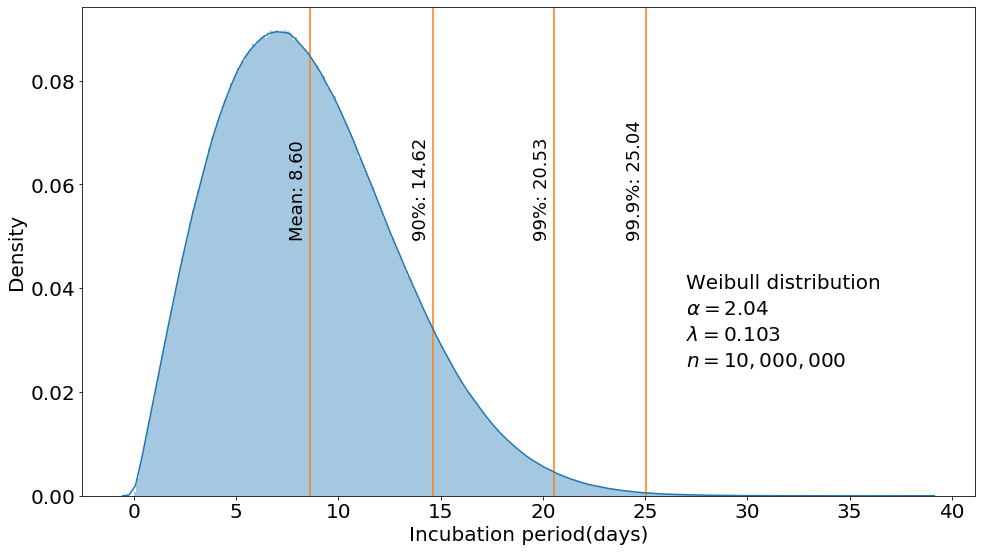

In [448]:
fig, ax = plt.subplots(figsize=(16,9))
ax.tick_params(labelsize=20)
ax.set_xlabel('Incubation period(days)', fontsize=20)
ax.set_ylabel('Density', fontsize=20)

ax.axvline(x=sample.mean(), c='C1')
ax.annotate('Mean: %.2f'%sample.mean(), xy=(sample.mean()-1, 0.05), rotation=90, fontsize=18)

ax.axvline(x=np.percentile(sample, 90), c='C1')
ax.annotate('90%: '+'%.2f'%np.percentile(sample, 90), xy=(np.percentile(sample, 90)-1, 0.05), rotation=90, fontsize=18)

ax.axvline(x=np.percentile(sample, 99), c='C1')
ax.annotate('99%: ' + '%.2f'%np.percentile(sample, 99), xy=(np.percentile(sample, 99)-1, 0.05), rotation=90, fontsize=18)

ax.axvline(x=np.percentile(sample, 99.9), c='C1')
ax.annotate('99.9%: ' + '%.2f'%np.percentile(sample, 99.9), xy=(np.percentile(sample, 99.9)-1, 0.05), rotation=90, fontsize=18)

ax.annotate('Weibull distribution', xy=(27,0.04), fontsize=20)
ax.annotate(r'$\alpha = 2.04$', xy=(27,0.035), fontsize=20)
ax.annotate(r'$\lambda = 0.103$', xy=(27,0.03), fontsize=20)
ax.annotate(r'$n  = 10,000,000$', xy=(27,0.025), fontsize=20)

sns.distplot(sample, ax=ax, bins=500)
plt.savefig('figures/Weibull distribution')

# Wikipedia

In [154]:
import requests

In [156]:
website_url = requests.get('https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Canada').text

In [173]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
My_table = soup.find('table',{'class':'wikitable', 'style':'text-align:center; font-size:85%;'})
links = My_table.findAll('a')

In [175]:
My_table

<table class="wikitable" style="text-align:center; font-size:85%;">
<caption><span class="nowrap"><a class="mw-selflink selflink">COVID-19 cases in Canada</a> by province and territory(<div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data/Canada_medical_cases" title="Template:2019–20 coronavirus pandemic data/Canada medical cases"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:2019%E2%80%9320_coronavirus_pandemic_data/Canada_medical_cases" title="Template talk:2019–20 coronavirus pandemic data/Canada medical cases"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data/Canada_medical_cases&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div>)</span>
<p class="mw-empty-elt"></p></caption>
<tbo

# Greece and Spain comparison

In [13]:
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
confirm['time'] = pd.to_datetime(confirm.index)
confirm.index = confirm.time.dt.strftime('%m/%d')

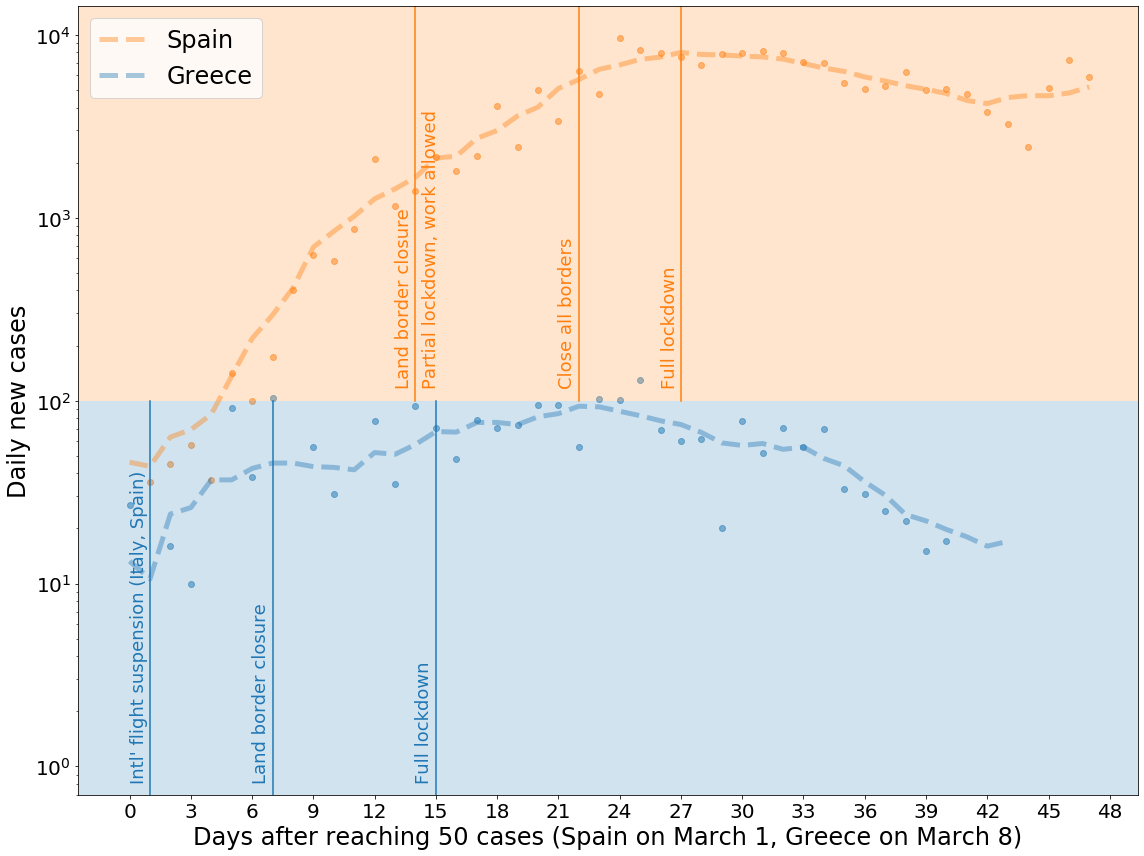

In [245]:
focus = confirm[['Greece','Spain']].copy().iloc[39:]
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    
offset = -7
focus['Greece'] = focus['Greece'].shift(offset)
focus = focus.reset_index(drop=True)
    
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,12), sharex=True)

ax.scatter(x=focus.index, y=focus['Spain'], color='C1', alpha=0.5)
ax.plot(focus.index, focus['Spain'].rolling(window=7, min_periods=1, center=True).mean(), color='C1', ls='--', lw=5, alpha=0.4, label='Spain')

ax.scatter(x=focus.index, y=focus['Greece'], color='C0', alpha=0.5)
ax.plot(focus.index, focus['Greece'].rolling(window=7, min_periods=1, center=True).mean(), color='C0', ls='--', lw=5, alpha=0.4, label='Greece')


ax.set_yscale('log')
# ax.plot(focus.index, focus['Spain'], 'o--', label='Daily Cases in Spain', alpha=0.7)

plt.axhspan(ymin=0.5, ymax=100, facecolor='C0', alpha=0.2)
plt.axhspan(ymin=100, ymax=14285, facecolor='C1', alpha=0.2)

# Spain
# ax.axvline(x=16, ymin=0.5, color='C1')
# ax.annotate('School closure', xy=(15,123), rotation=90, color='C1', fontsize=18)

# ax.axvline(x=17, ymin=0.5, color='C1')
# ax.annotate('Limit gathering', xy=(16,123), rotation=90, color='C1', fontsize=18)

ax.axvline(x=14, ymin=0.5, color='C1')
ax.annotate('Land border closure', xy=(13,123), rotation=90, color='C1', fontsize=18)

# ax.axvline(x=23, ymin=0.5, color='C1')
ax.annotate('Partial lockdown, work allowed', xy=(14.3,123), rotation=90, color='C1', fontsize=18)

ax.axvline(x=22, ymin=0.5, color='C1')
ax.annotate('Close all borders', xy=(21,123), rotation=90, color='C1', fontsize=18)

ax.axvline(x=27, ymin=0.5, color='C1')
ax.annotate('Full lockdown', xy=(26,123), rotation=90, color='C1', fontsize=18)


# Greece
ax.axvline(x=8+offset, ymax=0.5)
ax.annotate('Intl\' flight suspension (Italy, Spain)', xy=(7+offset,0.85), rotation=90, color='C0', fontsize=18)

# ax.axvline(x=18, ymax=0.5)
# ax.annotate('School closure', xy=(17,0.85), rotation=90, color='C0', fontsize=18)

# ax.axvline(x=20, ymax=0.5)
# ax.annotate('Limit gathering', xy=(19,0.85), rotation=90, color='C0', fontsize=18)

ax.axvline(x=14+offset, ymax=0.5)
ax.annotate('Land border closure', xy=(13+offset,0.85), rotation=90, color='C0', fontsize=18)

ax.axvline(x=22+offset, ymax=0.5)
ax.annotate('Full lockdown', xy=(21+offset,0.85), rotation=90, color='C0', fontsize=18)


# ax.set_xlim(left=7)
ax.set_ylabel('Daily new cases', fontsize=24)
ax.set_xlabel('Days after reaching 50 cases (Spain on March 1, Greece on March 8)', fontsize=24)
ax.set_ylim(bottom=0.7, top=14285)
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=24)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.format_xdata = mdates.DateFormatter('%m-%d')
plt.tight_layout()
plt.savefig('figures/Greece_Spain.png', dpi=600)

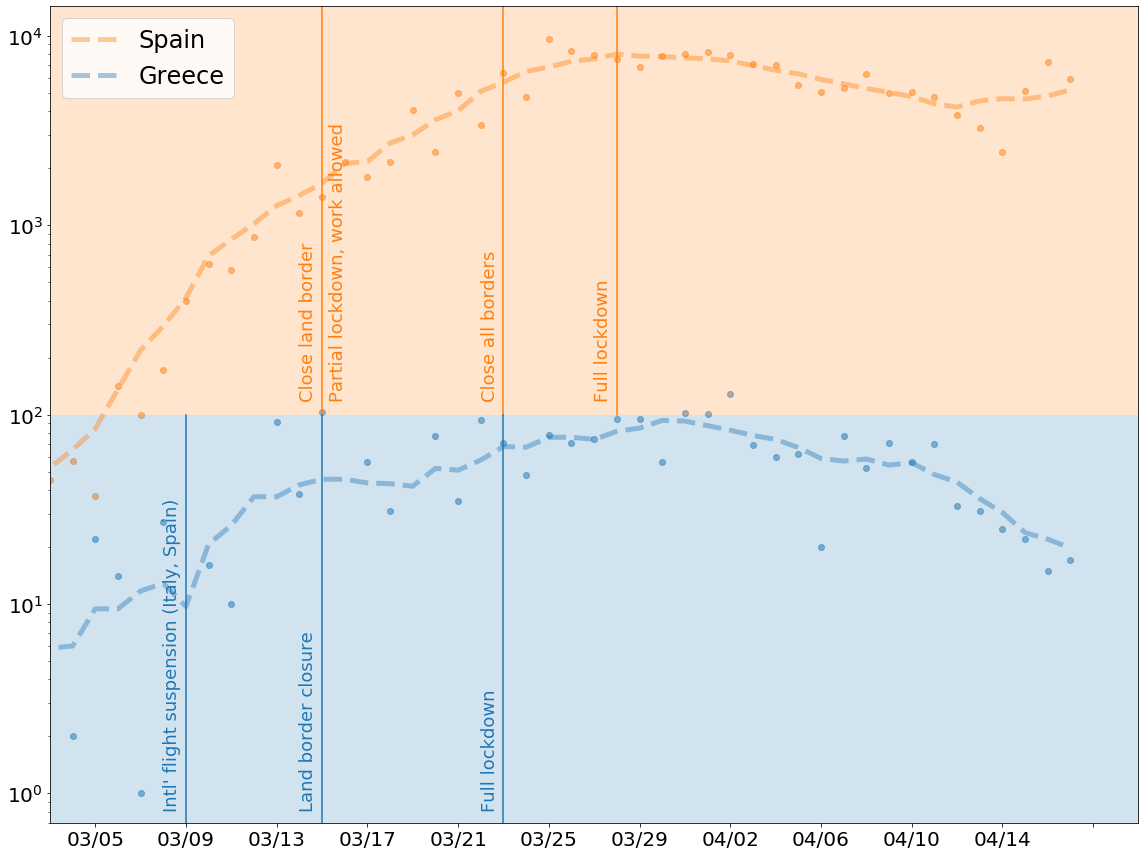

In [244]:
focus = confirm[['Greece','Spain']].copy().iloc[31:]
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    
    
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,12), sharex=True)

ax.scatter(x=focus.index, y=focus['Spain'], color='C1', alpha=0.5)
ax.plot(focus.index, focus['Spain'].rolling(window=7, min_periods=1, center=True).mean(), color='C1', ls='--', lw=5, alpha=0.4, label='Spain')

ax.scatter(x=focus.index, y=focus['Greece'], color='C0', alpha=0.5)
ax.plot(focus.index, focus['Greece'].rolling(window=7, min_periods=1, center=True).mean(), color='C0', ls='--', lw=5, alpha=0.4, label='Greece')


ax.set_yscale('log')
# ax.plot(focus.index, focus['Spain'], 'o--', label='Daily Cases in Spain', alpha=0.7)

plt.axhspan(ymin=0.5, ymax=100, facecolor='C0', alpha=0.2)
plt.axhspan(ymin=100, ymax=14285, facecolor='C1', alpha=0.2)

# Spain
# ax.axvline(x=16, ymin=0.5, color='C1')
# ax.annotate('School closure', xy=(15,123), rotation=90, color='C1', fontsize=18)

# ax.axvline(x=17, ymin=0.5, color='C1')
# ax.annotate('Limit gathering', xy=(16,123), rotation=90, color='C1', fontsize=18)

ax.axvline(x=22, ymin=0.5, color='C1')
ax.annotate('Close land border', xy=(21,123), rotation=90, color='C1', fontsize=18)

# ax.axvline(x=23, ymin=0.5, color='C1')
ax.annotate('Partial lockdown, work allowed', xy=(22.3,123), rotation=90, color='C1', fontsize=18)

ax.axvline(x=30, ymin=0.5, color='C1')
ax.annotate('Close all borders', xy=(29,123), rotation=90, color='C1', fontsize=18)

ax.axvline(x=35, ymin=0.5, color='C1')
ax.annotate('Full lockdown', xy=(34,123), rotation=90, color='C1', fontsize=18)

# Greece
ax.axvline(x=16, ymax=0.5)
ax.annotate('Intl\' flight suspension (Italy, Spain)', xy=(15,0.85), rotation=90, color='C0', fontsize=18)

# ax.axvline(x=18, ymax=0.5)
# ax.annotate('School closure', xy=(17,0.85), rotation=90, color='C0', fontsize=18)

# ax.axvline(x=20, ymax=0.5)
# ax.annotate('Limit gathering', xy=(19,0.85), rotation=90, color='C0', fontsize=18)

ax.axvline(x=22, ymax=0.5)
ax.annotate('Land border closure', xy=(21,0.85), rotation=90, color='C0', fontsize=18)

ax.axvline(x=30, ymax=0.5)
ax.annotate('Full lockdown', xy=(29,0.85), rotation=90, color='C0', fontsize=18)


ax.set_xlim(left=10)
ax.set_ylim(bottom=0.7, top=14285)
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=24)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.format_xdata = mdates.DateFormatter('%m-%d')
plt.tight_layout()
# plt.savefig('figures/Greece_Spain.png', dpi=600)

# Australia and New Zealand

In [256]:
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
confirm['time'] = pd.to_datetime(confirm.index)
confirm.index = confirm.time.dt.strftime('%m/%d')

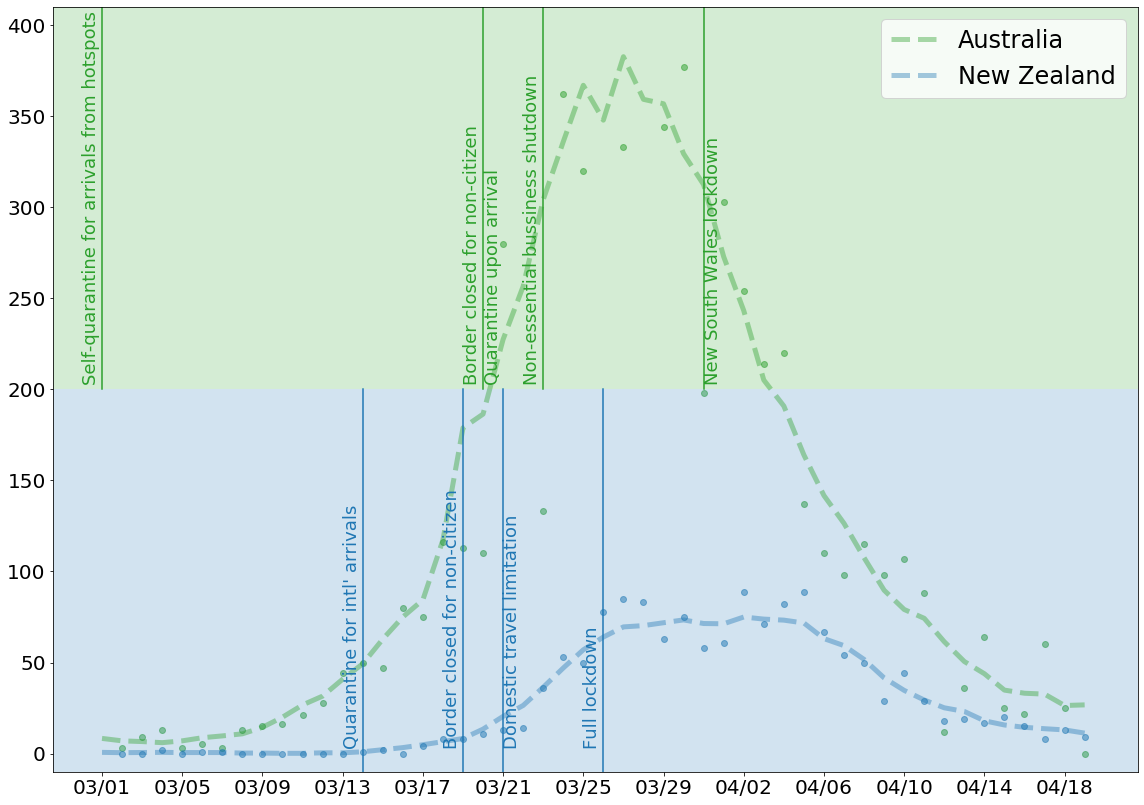

In [302]:
focus = confirm[['Australia','New Zealand']].copy().iloc[39:]
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    
    
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,12), sharex=True)

ax.scatter(x=focus.index, y=focus['Australia'], color='C2', alpha=0.5)
ax.plot(focus.index, focus['Australia'].rolling(window=7, min_periods=1, center=True).mean(), color='C2', ls='--', lw=5, alpha=0.4, label='Australia')

ax.scatter(x=focus.index, y=focus['New Zealand'], color='C0', alpha=0.5)
ax.plot(focus.index, focus['New Zealand'].rolling(window=7, min_periods=1, center=True).mean(), color='C0', ls='--', lw=5, alpha=0.4, label='New Zealand')


# ax.set_yscale('log')
# ax.plot(focus.index, focus['Australia'], 'o--', label='Daily Cases in Spain', alpha=0.7)

plt.axhspan(ymin=-10, ymax=200, facecolor='C0', alpha=0.2)
plt.axhspan(ymin=200, ymax=410, facecolor='C2', alpha=0.2)

# Australia
ax.axvline(x=0, ymin=0.5, color='C2')
ax.annotate('Self-quarantine for arrivals from hotspots', xy=(-1,205), rotation=90, color='C2', fontsize=18)

ax.axvline(x=19, ymin=0.5, color='C2')
ax.annotate('Border closed for non-citizen\nQuarantine upon arrival', xy=(18,205), rotation=90, color='C2', fontsize=18)

ax.axvline(x=22, ymin=0.5, color='C2')
ax.annotate('Non-essential bussiness shutdown', xy=(21,205), rotation=90, color='C2', fontsize=18)

ax.axvline(x=30, ymin=0.5, color='C2')
ax.annotate('New South Wales lockdown', xy=(30,205), rotation=90, color='C2', fontsize=18)


# New Zealand
ax.axvline(x=13, ymax=0.5)
ax.annotate('Quarantine for intl\' arrivals', xy=(12,5), rotation=90, color='C0', fontsize=18)

ax.axvline(x=18, ymax=0.5)
ax.annotate('Border closed for non-citizen', xy=(17,5), rotation=90, color='C0', fontsize=18)

ax.axvline(x=20, ymax=0.5)
ax.annotate('Domestic travel limitation', xy=(20,5), rotation=90, color='C0', fontsize=18)

ax.axvline(x=25, ymax=0.5)
ax.annotate('Full lockdown', xy=(24,5), rotation=90, color='C0', fontsize=18)

# ax.set_xlim(left=10)
ax.set_ylim(bottom=-10, top=410)
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=24)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.format_xdata = mdates.DateFormatter('%m-%d')
plt.tight_layout()

plt.savefig('figures/Aus_NZ.png', dpi=600)

# New York vs rest of US

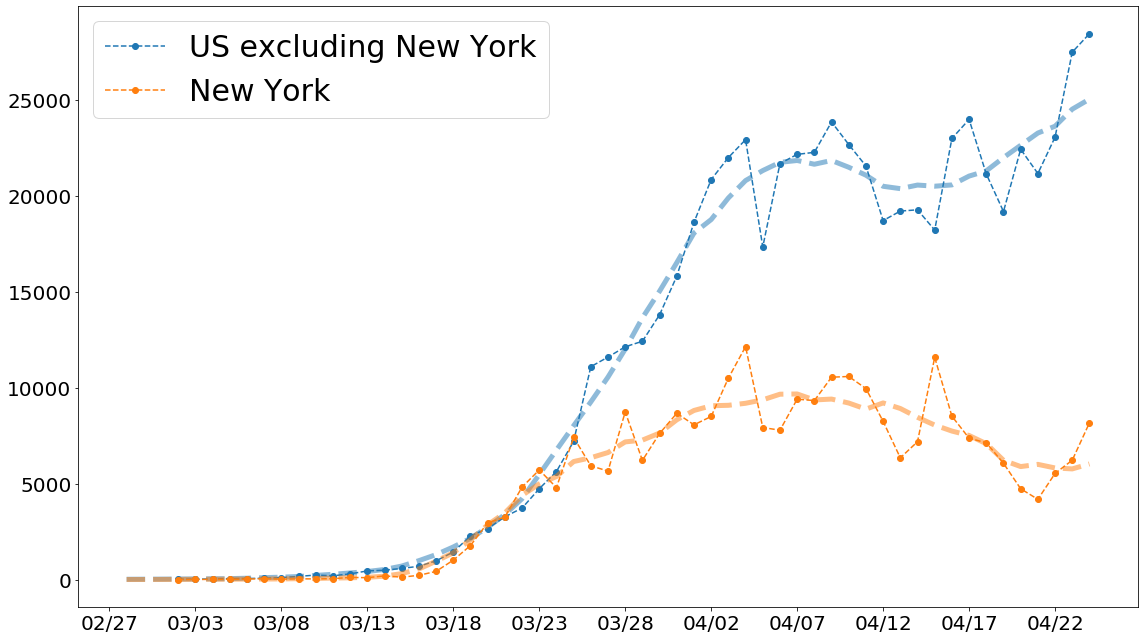

In [805]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
ax.plot(df.sum(axis=1)-df['New York'], 'o--', label='US excluding New York')

window = 7
df['average1'] = (df.sum(axis=1)-df['New York']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average1, color='C0',ls='--', lw=5, alpha=0.5)

ax.plot(df['New York'], 'o--', label='New York')
df['average2'] = (df['New York']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average2, color='C1',ls='--', lw=5, alpha=0.5)

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/NY_vs_US.png' , dpi=600)

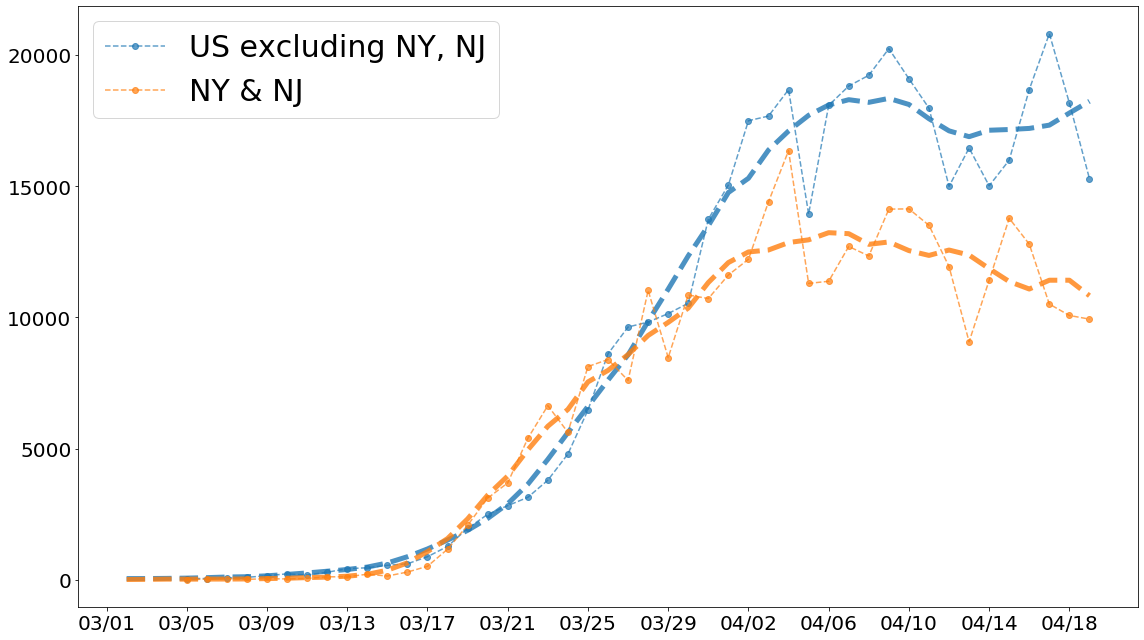

In [316]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
ax.plot(df.sum(axis=1)-df['New York']-df['New Jersey'], 'o--', label='US excluding NY, NJ',  alpha=0.7)

window = 7
df['average1'] = (df.sum(axis=1)-df['New York']-df['New Jersey']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average1, color='C0',ls='--', lw=5, alpha=0.8)

ax.plot(df['New York']+df['New Jersey'], 'o--', label='NY & NJ', alpha=0.7)
df['average2'] = (df['New York']+df['New Jersey']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average2, color='C1',ls='--', lw=5, alpha=0.8)

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/NYNJ_vs_US.png' , dpi=600)

# States dymamics

In [506]:
s1.rolling(window=window, min_periods=1, center=True).mean()

date
2020-02-22       0.000000
2020-02-23       0.000000
2020-02-24       0.000000
2020-02-25       0.000000
2020-02-26       0.000000
                 ...     
2020-04-18    1862.285714
2020-04-19    1860.857143
2020-04-20    1793.833333
2020-04-21    1708.400000
2020-04-22    1643.000000
Name: Massachusetts, Length: 61, dtype: float64

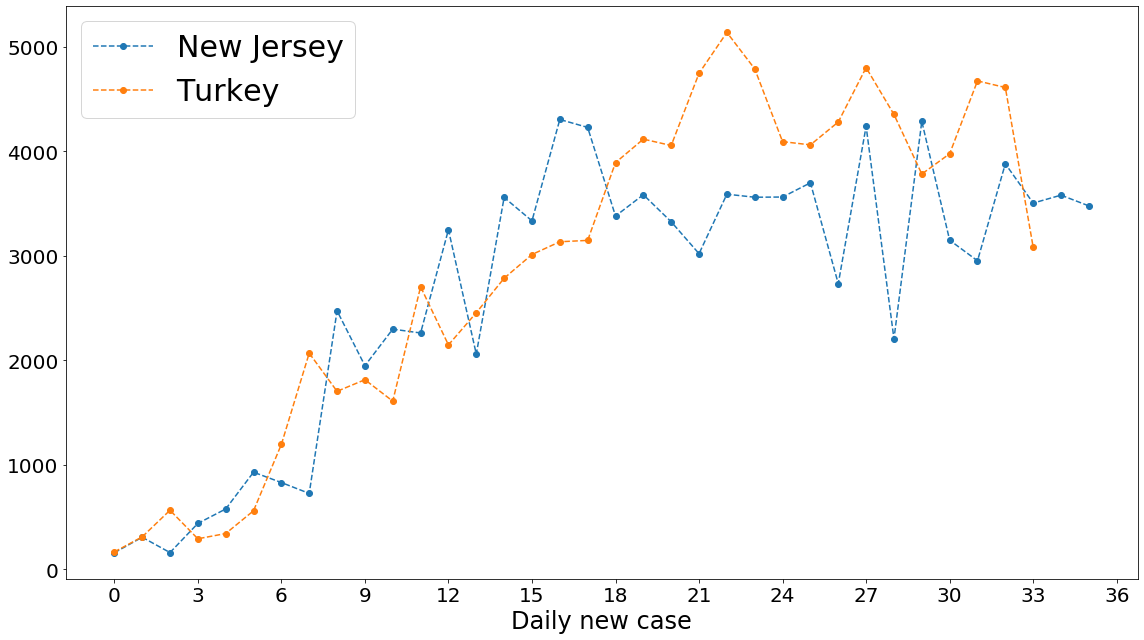

In [517]:
state = 'New Jersey'
country = 'Turkey'
threshold = 100
window = 7

df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
s1 = df[state]

df = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
s2  = df[country]

s1 = s1 - s1.shift(1)
s2 = s2 - s2.shift(1)

s1 = s1.fillna(0).astype(int).values
s2 = s2.fillna(0).astype(int).values
s1 = s1[s1>threshold]
s2 = s2[s2>threshold]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(s1, 'o--', label=state)
ax.plot(s2, 'o--', label=country)
# ax.set_yscale('log')

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)
ax.set_xlabel('Days after more cumulates more than 100 cases', fontsize=24)
ax.set_xlabel('Daily new case', fontsize=24)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/Daily_misc_4_23.png', dpi=600)

# Latin America dynamics

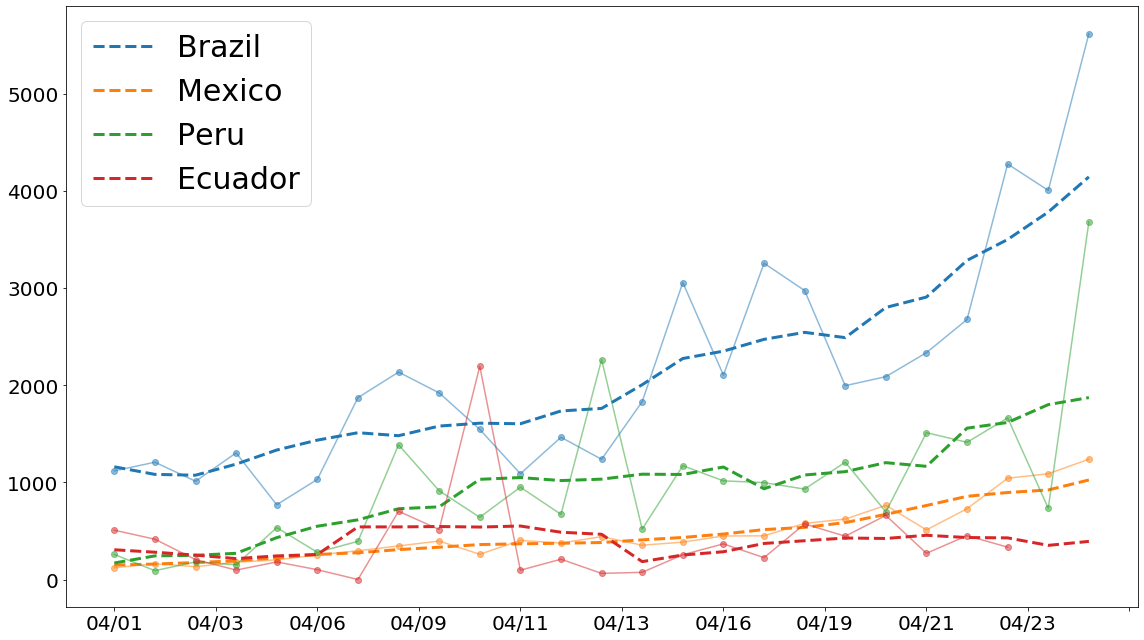

In [804]:
df = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
for i in list(df):
    df[i] = df[i] - df[i].shift(1)

focus = df[[
    'Brazil',
    'Mexico',
#     'Dominican Republic',
#     'Panama',
    'Peru',
    'Ecuador',
#     'Chile',
#     'Colombia'
]].copy().iloc[70:]
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time',axis=1,inplace=True)

focus.at['04/24','Ecuador'] = np.nan
focus.at['04/23','Mexico'] = 1043
focus.at['04/24','Mexico'] = 1089

focus.at['04/25','Brazil']=5621
focus.at['04/25','Mexico']=1239
focus.at['04/25','Peru']=3683
# focus.at['04/25','Chile']=552



fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for j, i in enumerate(list(focus)):
    ax.plot(focus[i], 'o-',c='C'+str(j), alpha=0.5)
    ax.plot(focus[i].rolling(window=window, min_periods=1, center=True).mean(), lw=3, ls='--', label=i)
    

ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig('figures/Daily_misc_4_25.png', dpi=600)

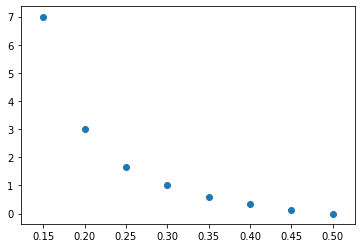

In [826]:
k = np.linspace(0.15,0.5,8)
plt.scatter(k, (0.5-k)/(k-0.1))